In [81]:
#qiskit service and plot imports
from qiskit_ibm_runtime import QiskitRuntimeService
from matplotlib import pyplot as plt

In [82]:
#configure your service
service = QiskitRuntimeService()

In [83]:
#preevious results
print("Insert job id:")
job_id = input()
print(job_id)
job = service.job(job_id) #previous job id (see previous job_id)
job.status()
result = job.result()

Insert job id:
cvfreh2w5350008x5zt0


In [84]:
#filter data
data = result[0].data.c.get_counts()
threshold = 15
filtered_data = {key: value for key, value in data.items() if value > threshold}

In [85]:
#set graph title and save name
print("Insert graph title:")# something like: "2 Full Adders (inputs: 1,1,1 and 1,1,0)"
title = input()
print(title)
print("Insert graph save name:")
save_name = "results/"+input()+".png"
print(save_name)

Insert graph title:
3 Full Adders ( inputs: 1,1 in each other; carry in: 1 , 0  and 0)
Insert graph save name:
results/3-full-adders.png


In [86]:
for i in filtered_data.keys(): i = str(i)
type(i)

str

['111111111111111', '011111111001111', '001111011001111', '011111011001111', '111111011111111', '001111111000111', '111100111110111', '101100011111111', '111100111001111', '111100111111111', '101100011000111', '011111011000111', '111100011000111', '101111011001111', '011100111111111', '101100011001111', '011100011110111', '001100111001111', '101111111000111', '101100111001111', '101111111001111', '101100111110111', '111111111001111', '001111011000111', '001100011001111', '001100011111111', '001100111000111', '101100111000111', '011111111110111', '101111011110111', '011100011001111', '101111011111111', '101111111110111', '001111111001111', '111100111000111', '001100111111111', '111111011001111', '001100011000111', '001100111110111', '011100011000111', '101111011000111', '111111111000111', '101100111111111', '101100011110111', '001111011110111', '011100111000111', '111111011000111', '001111111110111', '011100011111111', '111100011001111', '111111111110111', '111111011110111', '0111001110

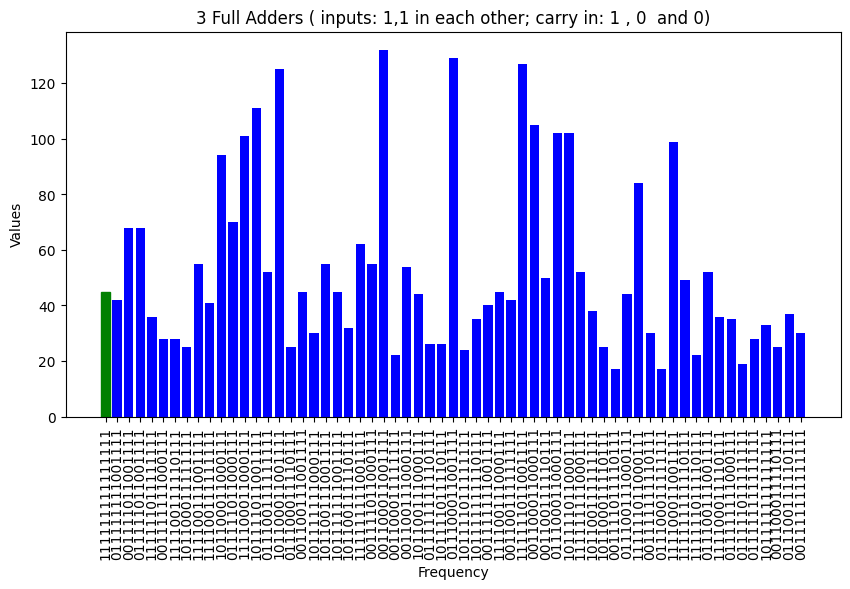

In [88]:
#plot your histogram with results and save image
names = list(filtered_data.keys())
values = list(filtered_data.values())

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(names, values, color='blue')

correct_value = names.index('111111111111111')
bars[correct_value].set_color('green')

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, rotation=90)
ax.set_title(title)
ax.set_xlabel('Frequency')
ax.set_ylabel('Values')

# Salvar a imagem do gráfico
plt.savefig(save_name, bbox_inches="tight")
plt.show()